# Rasterio Library Introduction

---

## Import the library and make a first example

In the next code space I just import the Rasterio library and in the next code space you can find some examples on how to use Rasterio.

In [6]:
# Importing the useful libraries
import rasterio
from rasterio.plot import show
from rasterio.windows import Window
import matplotlib.pyplot as plt
import numpy as np

# Find a file or a URL link to get a .tif file
url = "https://github.com/mapbox/rasterio/raw/main/tests/data/RGB.byte.tif"

In [44]:
# Open the raster file
with rasterio.open(url) as src:
    # Print basic information about the raster
    print("Raster width (columns):", src.width)
    print("Raster height (rows):", src.height)
    print("Number of bands:", src.count)
    print("Coordinate Reference System (CRS):", src.crs)
    print("Raster Transform (geospatial info):", src.transform)

Raster width (columns): 791
Raster height (rows): 718
Number of bands: 3
Coordinate Reference System (CRS): PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Raster Transform (geospatial info): | 300.04, 0.00, 101985.00|
| 0.00,-300.04, 2826915.00|
| 0.00, 0.00, 1.00|


In [45]:
# Open the raster file
with rasterio.open(url) as src:
    # Read the first band (bands are 1-indexed)
    band1 = src.read(1)

print(band1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


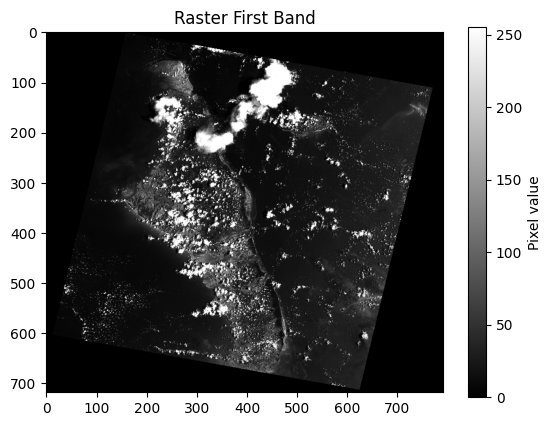

In [46]:
# Open the raster file
with rasterio.open(url) as src:
    band1 = src.read(1)

# Plot the band
plt.imshow(band1, cmap='gray')
plt.colorbar(label='Pixel value')
plt.title('Raster First Band')
plt.show()

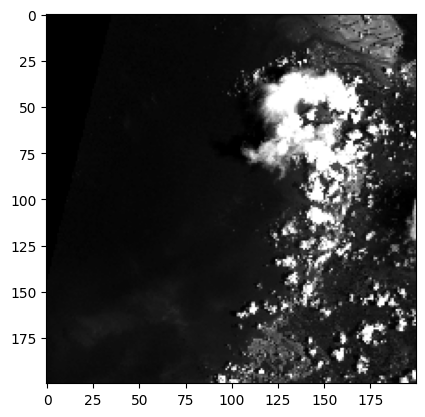

<Axes: >

In [47]:
# Open the raster
with rasterio.open(url) as src:
    # Define a window: col_off, row_off, width, height
    window = Window(100, 100, 200, 200)  # Crop a 200x200 pixel box starting from (100,100)
    cropped = src.read(1, window=window)

# Show the cropped part
show(cropped, cmap='gray')

---

## Try and use another file not stored online

Sometimes, not everything is already made and adapted for you, so you have to work to make it really work.



In [2]:
# Load the raster file
italy_data = "data/U2018_CLC2018_V2020_20u1.tif"

# Open the raster file
itd = rasterio.open(italy_data)

### Test 1: Reading a Raster File and Plotting It

{'driver': 'GTiff', 'dtype': 'int8', 'nodata': -128.0, 'width': 9942, 'height': 12807, 'count': 1, 'crs': CRS.from_wkt('PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["unnamed",SPHEROID["GRS 1980",6378137,298.257222101004]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(99.99999999878408, 0.0, 4055199.9999999995,
       0.0, -100.00000000121585, 2666700.000000011), 'blockxsize': 9942, 'blockysize': 106, 'tiled': False, 'compress': 'packbits', 'interleave': 'band'}
[[[-128 -128 -128 ... -128 -128 -128]
  [-128 -128 -128 ... -128 -128 -128]
  [-128 -128 -128 ... -128 -128 -128]
  ...
  [-128 -128 -128 ... -128 -128 -128]
  [-128 -128 -128 ... -128 -128 -128]
  [-128 -128 -128

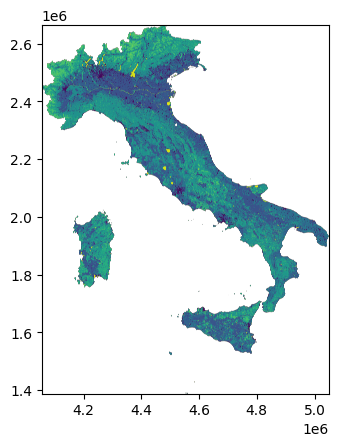

<Axes: >

In [49]:
# Show basic information about the raster
print(itd.profile)
print(itd.read())

# Show the image
show(itd)

### Test 2: Extracting a Specific Band from the Raster

Many raster files (e.g., satellite images) contain multiple bands. You can extract and plot a specific band.

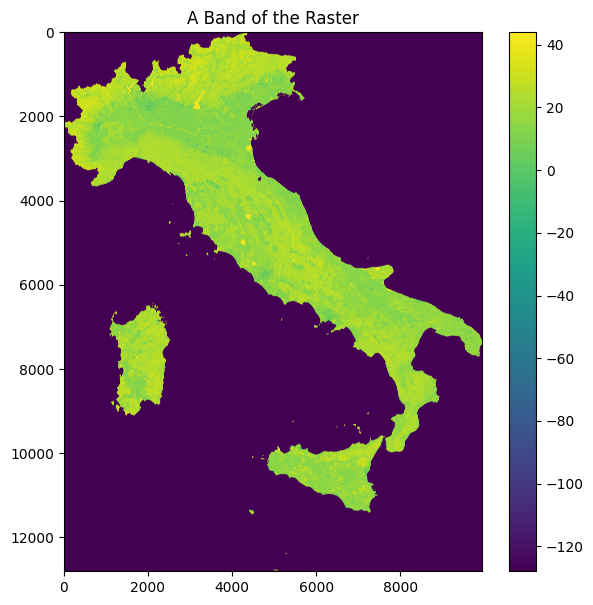

In [50]:
# Read a band
band = itd.read(1)

# Plot the band
plt.figure(figsize=(7, 7))
plt.imshow(band, cmap='viridis')
plt.colorbar()
plt.title("A Band of the Raster")
plt.show()

### Test 3: Resampling a Raster to a New Resolution

You can change the resolution of a raster (resample) using rasterio.

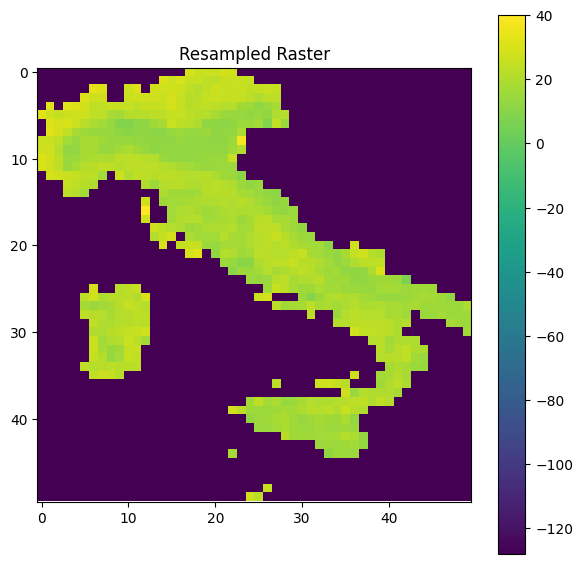

In [51]:
from rasterio.enums import Resampling

# Set the new resolution
new_resolution = (50, 50)  # new pixel size (rows, columns)

# Calculate the scaling factor
scale_x = itd.width / new_resolution[1]
scale_y = itd.height / new_resolution[0]

# Resample the raster using the average resampling method
data = itd.read(
    out_shape=(
        itd.count,
        int(itd.height / scale_y),
        int(itd.width / scale_x)
    ),
    resampling=Resampling.average
)

# Update the metadata for the new resolution
new_transform = itd.transform * itd.transform.scale(
    (itd.width / data.shape[-1]),
    (itd.height / data.shape[-2])
)

# Plot the resampled raster
plt.figure(figsize=(7, 7))
plt.imshow(data[0], cmap='viridis')
plt.colorbar()
plt.title("Resampled Raster")
plt.show()

### Test 4: Extract unique values from a raster (CLC classes)

Useful for analyzing the land use classes present.

In [52]:
import numpy as np

data = itd.read(1)

# Extract unique values (CLC classes)
unique_classes = np.unique(data)
print("Unique CLC classes in the raster:", unique_classes)

Unique CLC classes in the raster: [-128    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   40   41   42
   43   44]


### Test 5: Save a portion of the raster as a new file

If you want to save a window or region to a file.

In [53]:
# Read a window
window = Window(1000, 1000, 500, 500)
data = itd.read(1, window=window)

# Define metadata for the new raster
profile = itd.profile
profile.update({
    "height": window.height,
    "width": window.width,
    "transform": itd.window_transform(window)
})

# Write to new file
output_path = "data/cropped_raster.tif"
with rasterio.open(output_path, "w", **profile) as dst:
    dst.write(data, 1)

### Test 6: Print raster bounding box (extent)

Get the spatial extent of the raster using its bounds. Useful for mapping, aligning datasets, or spatial indexing.

In [5]:
with rasterio.open(italy_data) as src:
    bounds = src.bounds
    print("Bounding box:")
    print(f"Left: {bounds.left}")
    print(f"Bottom: {bounds.bottom}")
    print(f"Right: {bounds.right}")
    print(f"Top: {bounds.top}")

Bounding box:
Left: 4055199.9999999995
Bottom: 1385999.9999844397
Right: 5049399.9999879105
Top: 2666700.000000011


### Test 7: Mask NODATA values

Create a masked array that hides invalid or missing values (NODATA). Improves visualization and analysis.

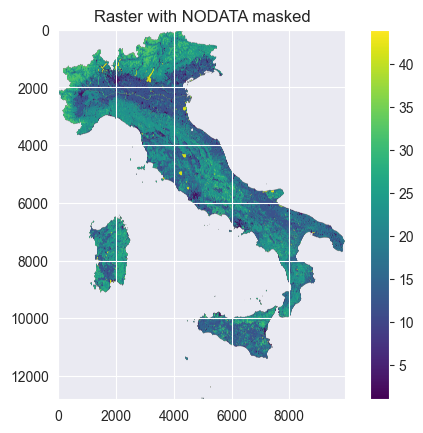

In [6]:
import numpy.ma as ma

with rasterio.open(italy_data) as src:
    band = src.read(1)
    masked_band = ma.masked_equal(band, src.nodata)

plt.imshow(masked_band, cmap="viridis")
plt.colorbar()
plt.title("Raster with NODATA masked")
plt.show()

### Test 8: Plot histogram of pixel values

Visualize the frequency of raster classes or pixel values. Useful to analyze land cover distributions or pixel intensity.

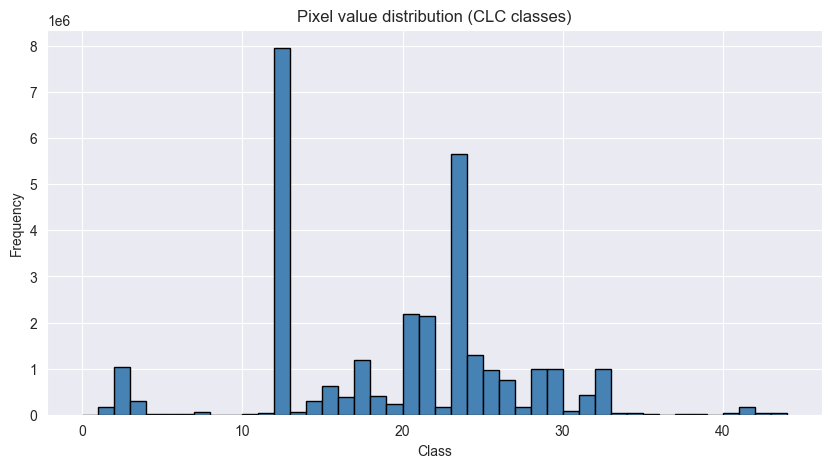

In [7]:
import numpy as np

with rasterio.open(italy_data) as src:
    data = src.read(1)
    masked_data = np.ma.masked_equal(data, src.nodata)

plt.figure(figsize=(10, 5))
plt.hist(masked_data.compressed(), bins=np.arange(0, 45), color="steelblue", edgecolor="black")
plt.title("Pixel value distribution (CLC classes)")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Test 9: Create logical mask (e.g. urban areas)

Generate a boolean mask to isolate specific classes (e.g., urban). Useful for filtering or calculating area/statistics.

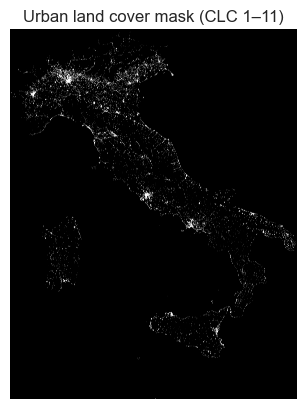

In [8]:
# Urban CLC classes typically range from 1 to 11
urban_mask = np.isin(data, np.arange(1, 12))

plt.imshow(urban_mask, cmap="gray")
plt.title("Urban land cover mask (CLC 1–11)")
plt.axis("off")
plt.show()

### Test 10: Calculate total area for a given class

Count how many pixels belong to a specific land cover class and convert to total area (e.g. in hectares).

In [10]:
# Assuming 100m resolution → pixel area = 100x100 m²
pixel_area_m2 = 100 * 100
target_class = 23  # For example: forest

with rasterio.open(italy_data) as src:
    data = src.read(1)
    count = np.sum(data == target_class)
    area_ha = (count * pixel_area_m2) / 10000  # hectares

print(f"Total area for class {target_class}: {area_ha:.2f} hectares")

Total area for class 23: 5663931.00 hectares


### Test 11: Visualize with CLC color map and legend

Create a custom colormap for land cover classes and show a legend with unique values for clearer interpretation.

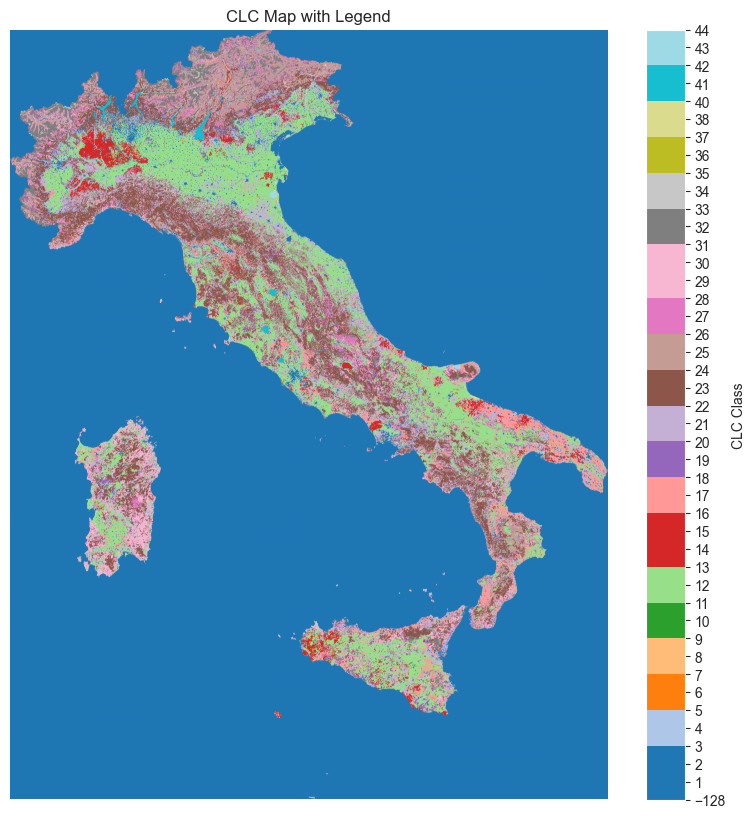

In [11]:
from matplotlib.colors import ListedColormap, BoundaryNorm

with rasterio.open(italy_data) as src:
    data = src.read(1)

# Extract unique classes
unique_classes = np.unique(data)
# Create a color map using tab20
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_classes)))
clc_cmap = ListedColormap(colors)
norm = BoundaryNorm(unique_classes, clc_cmap.N)

plt.figure(figsize=(10, 10))
img = plt.imshow(data, cmap=clc_cmap, norm=norm)
cbar = plt.colorbar(img, ticks=unique_classes)
cbar.set_label("CLC Class")
plt.title("CLC Map with Legend")
plt.axis("off")
plt.show()

### Test 12: Compute Zonal Statistics Using a Vector Mask
This example demonstrates how to compute the mean pixel value within a specified polygonal area using a vector mask.

The script uses a vector mask (e.g., a shapefile) to extract the area of interest from a raster file. It then computes the mean pixel value within this area, excluding any NODATA values.

This technique is useful for performing zonal statistics, such as calculating average land cover values within administrative boundaries.

In [4]:
import geopandas as gpd
from rasterio.mask import mask

# Load the raster file
with rasterio.open(italy_data) as src:
    # Load the vector mask (e.g., a shapefile with polygons)
    gdf = gpd.read_file("data/region_mask.shp")
    # Ensure the CRS matches
    gdf = gdf.to_crs(src.crs)
    # Mask the raster with the polygon
    out_image, out_transform = mask(src, gdf.geometry, crop=True)
    # Compute the mean of the masked area, excluding NODATA values
    masked_data = np.ma.masked_equal(out_image, src.nodata)
    mean_value = masked_data.mean()

print(f"Mean pixel value within the polygon: {mean_value}")


Mean pixel value within the polygon: 19.121878244350025


### Test 13: Raster Metadata and Land Cover Class Distribution

This test extracts basic metadata and value statistics from a land cover raster file (e.g. CORINE Land Cover). It provides both numeric and visual insights into the file's content.

This test is useful for quickly understanding the content and coverage of a raster without needing shapefiles or external region masks.



CRS: PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["unnamed",SPHEROID["GRS 1980",6378137,298.257222101004]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]

Dimensions (pixels): 9942 x 12807

Resolution: 99.99999999878408m x 100.00000000121585m per pixel

Bounds: BoundingBox(left=4055199.9999999995, bottom=1385999.9999844397, right=5049399.9999879105, top=2666700.000000011)

Covered area: 1273271.94 km²

Class 1: 157988 pixels (0.52%)

Class 2: 1033836 pixels (3.44%)

Class 3: 306488 pixels (1.02%)

Class 4: 19399 pixels (0.06%)

Class 5: 9948 pixels (0.03%)

Class 6: 22809 pixels (0.08%)

Class 7: 49699 pixels (0.17%)

Class 8: 4335 pixels (0.01%)

Class 9: 3333 pixels (0.01%)

Class 10: 11316 

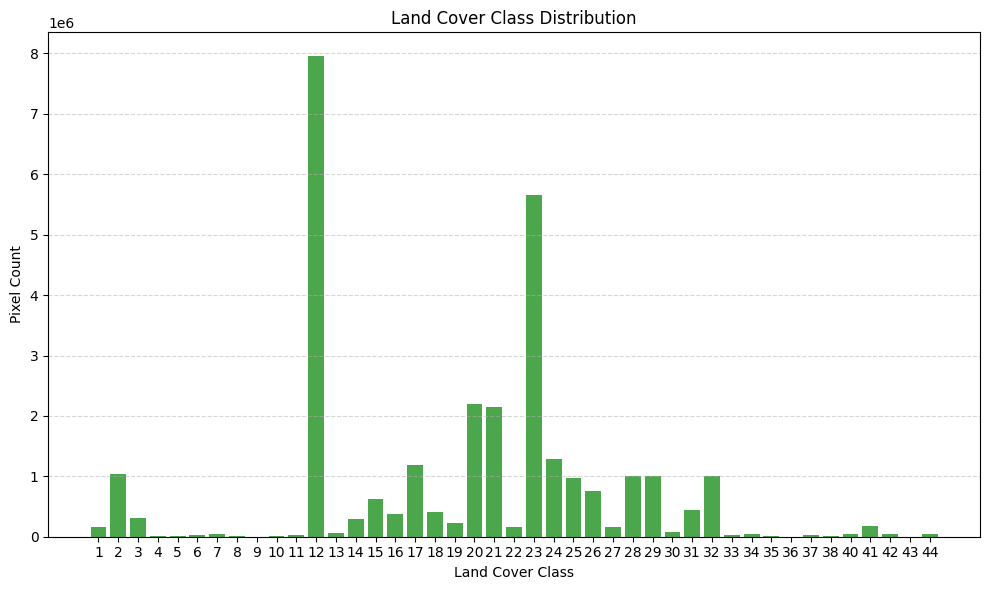

In [11]:
with rasterio.open(italy_data) as src:
    # Extract metadata
    width = src.width
    height = src.height
    res_x, res_y = src.res  # pixel size in meters
    crs = src.crs
    bounds = src.bounds

    print(f"\nCRS: {crs}")
    print(f"\nDimensions (pixels): {width} x {height}")
    print(f"\nResolution: {res_x}m x {res_y}m per pixel")
    print(f"\nBounds: {bounds}")

    # Calculate covered area in km²
    area_km2 = (width * res_x) * (height * res_y) / 1e6
    print(f"\nCovered area: {area_km2:.2f} km²")

    # Read the first band (assumes single-band raster)
    band1 = src.read(1)

    # Mask out no-data values
    data = band1[band1 != src.nodata]

    # Count unique land cover classes
    unique, counts = np.unique(data, return_counts=True)
    total_pixels = data.size
    percentages = counts / total_pixels * 100

    # Print class distribution
    for u, c, p in zip(unique, counts, percentages):
        print(f"\nClass {u}: {c} pixels ({p:.2f}%)")

    # Plot distribution
    plt.figure(figsize=(10, 6))
    plt.bar([str(u) for u in unique], counts, color="green", alpha=0.7)
    plt.xlabel("Land Cover Class")
    plt.ylabel("Pixel Count")
    plt.title("Land Cover Class Distribution")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

---